In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import pyplot as plt
import os.path

In [2]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

In [3]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

# Generación de datos

In [4]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Selección del Dataset

Dos tipos de datasets:
- generate_gaussians_distributions: Generado con dos gaussianas
- generate_elipse_data: Generado con distribución uniforme en el cuadrado [-1, 1], [-1, 1] y recortando con una elipse en el centro

Descomentar/comentar las lineas correspondientes para seleccionar uno u otro dataset

In [187]:
# X, y = generate_gaussians_distributions()
X, y = generate_elipse_data()

# Graficamos

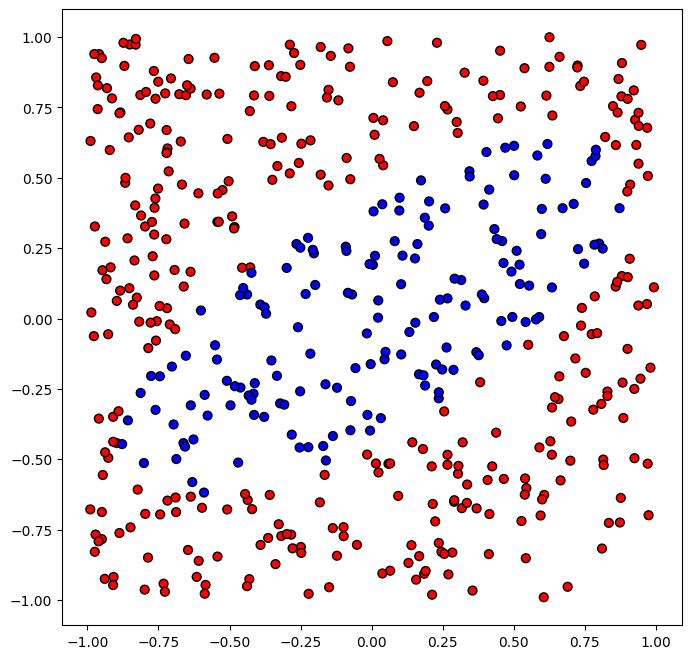

In [188]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

In [189]:
y[y==0].size/y.size

0.682

# Inicialización del modelo

Para Naive Bayes probar con: 
- priors=None, var_smoothing=1e-09 (Ambos datasets)
- priors=None, var_smoothing=0.2 (para generate_elipse_data) var_smoothing=1 (para generate_gaussians_distributions) 
- priors=[0.5, 0.5] (para generate_elipse_data) priors=[0.7, 0.3] (para generate_gaussians_distributions), var_smoothing=1e-09 

Para QDA:
- priors=None, reg_param=0.0, store_covariance=True (Ambos modelos)
- Cambio los parámetros como quiera y verifique si ocurre lo esperado

In [197]:
# model = GaussianNB(priors=None, var_smoothing=0.2)
model = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True)

In [198]:
# Entrenamiento del modelo
model.fit(X,y)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [199]:
if type(model)==GaussianNB:
    print(model.classes_) 
    prior1, prior2 = model.class_prior_
    print(f"priors: {(prior1,prior2)}")
    # updated scince sklean 1.3.0
    # sigma1, sigma2 = model.sigma_
    sigma1, sigma2 = model.var_
    print(f"vars: {(sigma1,sigma2)}")
    mu1, mu2 = model.theta_
    print(f"means: {(mu1,mu2)}")

In [200]:
if type(model)==QuadraticDiscriminantAnalysis:
    print(model.classes_) 
    prior1, prior2 =  model.priors_
    print(f"priors: {(prior1,prior2)}")
    mu1, mu2 = model.means_
    print(f"means: {(mu1,mu2)}")
    sigma1, sigma2 = model.covariance_
    print(f"covars: {(sigma1,sigma2)}")

[0 1]
priors: (0.682, 0.318)
means: (array([-0.10306606,  0.03149973]), array([0.01642741, 0.01449854]))
covars: (array([[ 0.41900429, -0.03087304],
       [-0.03087304,  0.435144  ]]), array([[0.20107088, 0.09373205],
       [0.09373205, 0.09619433]]))


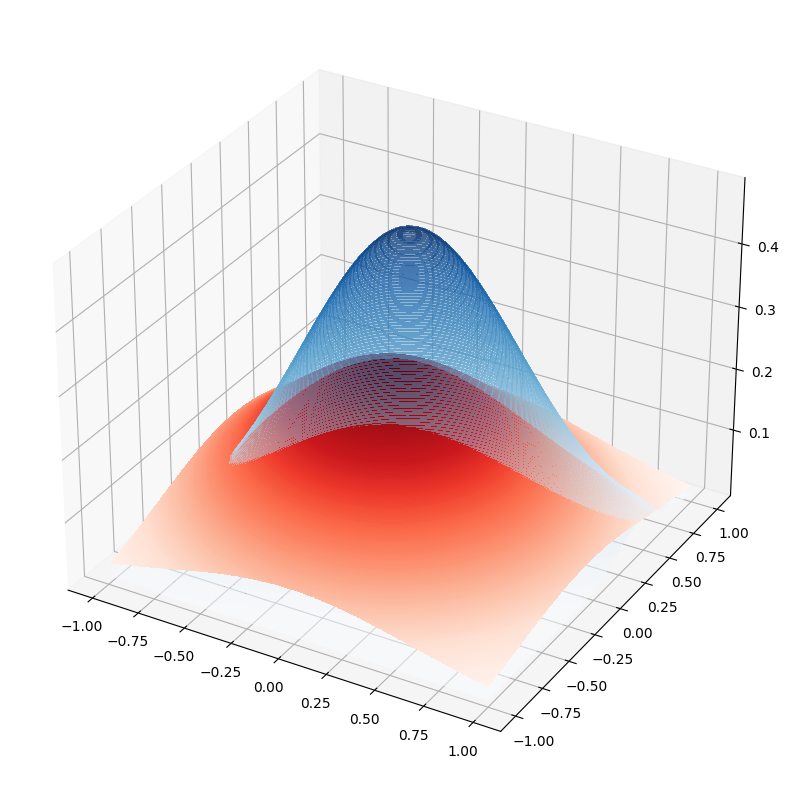

In [201]:
plot_gaussians(X, mu1, sigma1, mu2, sigma2, prior1, prior2)

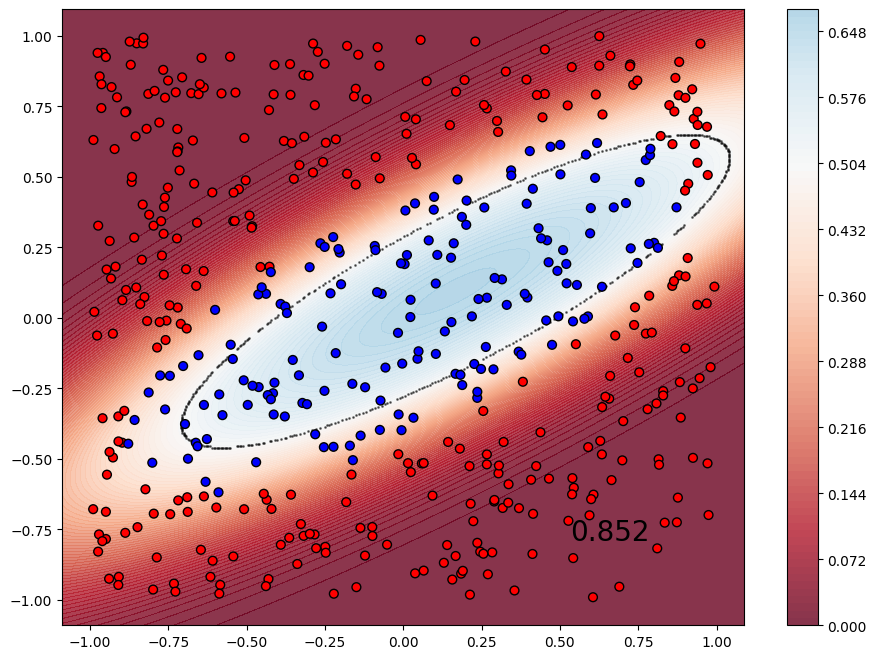

In [202]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [203]:
score

0.852